In [255]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression



from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots

from pmdarima.arima.utils import ndiffs

In [81]:
df = pd.read_excel('../raw_data/cleaned_data.xlsx').drop('Unnamed: 0',axis=1)
df.head()

,Date,BBWI_COO,F_COO,JCI_COO,TDG_COO,F_MTD,F_LH,HWM_LH,MLM_LH,NUE_LH,...,MSI_ROL,PCAR_ROL,GM_FIS,F_EBAY,NUE_EBAY,FDS_WELL,MOS_WELL,MPC_PPL,ALB_EXPE,RCL_TECH
0,2022-02-28,0.129193,0.042231,0.156810,1.584798,0.012260,0.064036,0.133031,1.404187,0.484114,...,6.742737,2.808011,0.495365,0.319138,2.412710,4.935906,0.635854,2.988404,0.995263,0.192802
1,2022-03-01,0.122627,0.039940,0.150227,1.548209,0.011789,0.061400,0.123631,1.362175,0.485791,...,6.507946,2.687288,0.479900,0.304849,2.411949,5.063797,0.636321,2.960085,0.988901,0.175641
2,2022-03-02,0.127060,0.042827,0.153257,1.580083,0.012833,0.066205,0.130499,1.396640,0.509156,...,6.522044,2.683561,0.491021,0.325967,2.506883,5.016822,0.645197,3.006327,0.990627,0.178398
3,2022-03-03,0.123758,0.041503,0.153000,1.525741,0.012324,0.064374,0.129454,1.394769,0.507366,...,6.605538,2.732250,0.489219,0.320865,2.528921,4.881579,0.660018,2.987481,1.002189,0.171448
4,2022-03-04,0.116190,0.039042,0.146333,1.450059,0.011934,0.061930,0.126352,1.398574,0.514247,...,6.543394,2.580805,0.473214,0.300348,2.493976,4.801994,0.695534,2.951453,1.012437,0.166966


Text(0.5, 1.0, 'BBWI vs COO ratio')

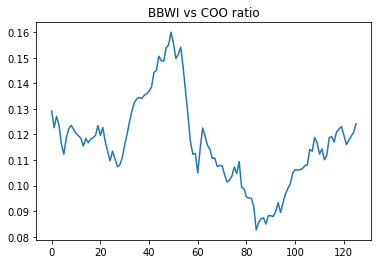

In [82]:
plt.plot(df['BBWI_COO'])
plt.title('BBWI vs COO ratio')

In [126]:
BBWI_COO = df[['Date','BBWI_COO']]
BBWI_COO

,Date,BBWI_COO
0,2022-02-28,0.129193
1,2022-03-01,0.122627
2,2022-03-02,0.127060
3,2022-03-03,0.123758
4,2022-03-04,0.116190
...,...,...
121,2022-08-22,0.116055
122,2022-08-23,0.117660
123,2022-08-24,0.119299
124,2022-08-25,0.120785


In [84]:
for i in range(1,8):
    BBWI_COO[f't-{i}'] = df['BBWI_COO'].shift(i)


/tmp/ipykernel_1545/3957775697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBWI_COO[f't-{i}'] = df['BBWI_COO'].shift(i)
/tmp/ipykernel_1545/3957775697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBWI_COO[f't-{i}'] = df['BBWI_COO'].shift(i)
/tmp/ipykernel_1545/3957775697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [85]:
BBWI_COO

,Date,BBWI_COO,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,2022-02-28,0.129193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-01,0.122627,0.129193,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-02,0.127060,0.122627,0.129193,NaN,NaN,NaN,NaN,NaN
3,2022-03-03,0.123758,0.127060,0.122627,0.129193,NaN,NaN,NaN,NaN
4,2022-03-04,0.116190,0.123758,0.127060,0.122627,0.129193,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
121,2022-08-22,0.116055,0.119805,0.123131,0.122132,0.121021,0.117015,0.119113,0.118774
122,2022-08-23,0.117660,0.116055,0.119805,0.123131,0.122132,0.121021,0.117015,0.119113
123,2022-08-24,0.119299,0.117660,0.116055,0.119805,0.123131,0.122132,0.121021,0.117015
124,2022-08-25,0.120785,0.119299,0.117660,0.116055,0.119805,0.123131,0.122132,0.121021


## Basic Linear Regression of BBWI_COO

In [101]:
df_train = BBWI_COO[:100].dropna()
df_test = BBWI_COO[100:].dropna()
df_train.set_index('Date',inplace=True)

In [102]:
df_test.set_index('Date',inplace=True)

In [103]:
X_train = df_train.drop(columns =['BBWI_COO'])
y_train = df_train['BBWI_COO']

X_test = df_test.drop(columns =['BBWI_COO'])
y_test = df_test['BBWI_COO']


In [104]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(93, 7) (93,) (26, 7) (26,)


In [105]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [107]:
pred = model.predict(X_test)

In [108]:
r2_score(y_test,pred)

0.6911581524509042

<AxesSubplot:>

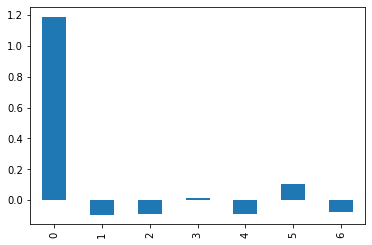

In [109]:
pd.Series(model.coef_).plot(kind='bar')

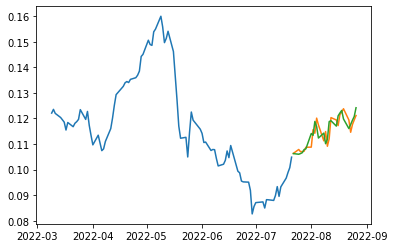

In [119]:
fig,ax1 = plt.subplots()
ax1.plot(y_train)
ax1.plot(y_test.index,pred)
ax1.plot(y_test)

## Stationarity

In [127]:
BBWI_COO.set_index('Date',inplace=True)
# decomp_add = seasonal_decompose(BBWI_COO['BBWI_COO'],model = 'additive',)
# decomp_add.plot()

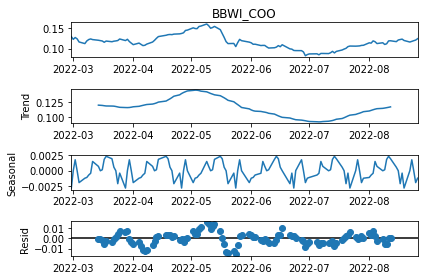

In [145]:
decomp_add = seasonal_decompose(BBWI_COO['BBWI_COO'],model = 'additive',period=20)
decomp_add.plot();

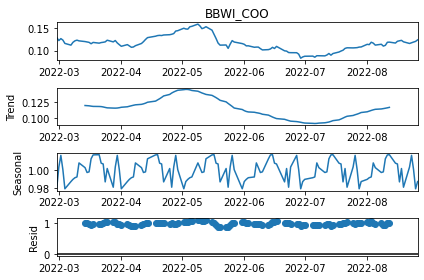

In [146]:
decomp_mult = seasonal_decompose(BBWI_COO['BBWI_COO'],model = 'multiplictive',period=20)
decomp_mult.plot();

([<matplotlib.lines.Line2D at 0x7fb22e400d60>],
 Text(0.5, 1.0, 'Multiplicative Residuals'))

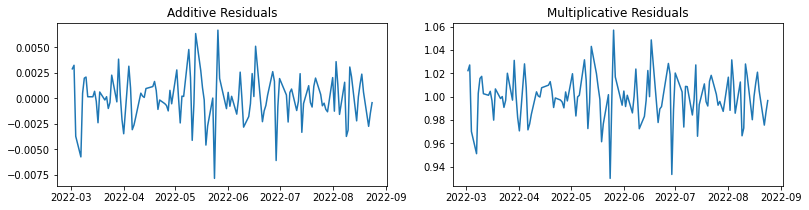

In [144]:
fig , (ax1 , ax2)  = plt.subplots(1,2,figsize=(13,3))
ax1.plot(decomp_add.resid),ax1.set_title('Additive Residuals')
ax2.plot(decomp_mult.resid),ax2.set_title('Multiplicative Residuals')

In [150]:
# Check Stationality using ADF test 
print(adfuller(BBWI_COO['BBWI_COO'])[1],
     adfuller(decomp_add.resid.dropna())[1],
     adfuller(decomp_mult.resid.dropna())[1])




0.42532142952345137 3.797104711063206e-05 5.490499921754307e-05


## AutoCorrelation

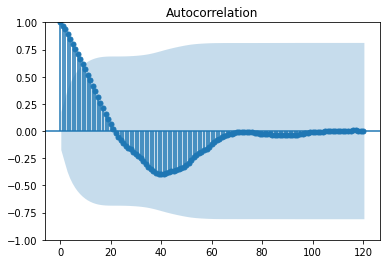

In [161]:
plot_acf(BBWI_COO['BBWI_COO'], lags=120);



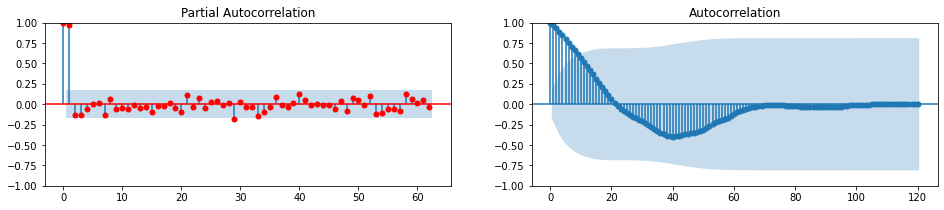

In [172]:
figs , axes = plt.subplots(1,2,figsize = (16,3));
plot_pacf(BBWI_COO['BBWI_COO'], lags = 62 , c='r',method='ywm', ax=axes[0]);
plot_acf(BBWI_COO['BBWI_COO'], lags=120,ax=axes[1]);

## Moving Averages 

### ARMA model Auto Regressive Moving Average

In [174]:
# AR = Auto Regressive as a linear combination p of lags y 
# MA = Moving average of lagged forecast errors

### ARIMA Auto Regressive Intergrated Moving Averages

In [196]:
df_ratio = df[['Date','BBWI_COO']]
df_ratio.set_index('Date',inplace=True)

In [198]:
df_ratio['t-1'] = df_ratio['BBWI_COO'].shift(1)

/tmp/ipykernel_1545/402814256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio['t-1'] = df_ratio['BBWI_COO'].shift(1)


In [201]:
df_dif = df_ratio.copy()
df_dif['diff'] = df_dif['BBWI_COO'] - df_dif['t-1']
df_dif.head()

,BBWI_COO,t-1,diff
Date,,,
2022-02-28,0.129193,NaN,NaN
2022-03-01,0.122627,0.129193,-0.006566
2022-03-02,0.127060,0.122627,0.004433
2022-03-03,0.123758,0.127060,-0.003302
2022-03-04,0.116190,0.123758,-0.007568


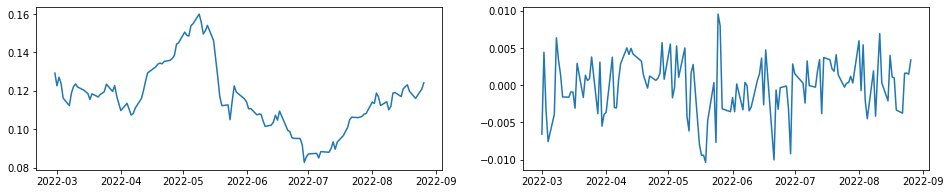

In [213]:
fig , (ax1,ax2)  = plt.subplots(1,2,figsize=(16,3))
ax1.plot(df_dif['BBWI_COO']),
ax2.plot(df_dif['diff'])

In [229]:
adfuller(df_dif['diff'].dropna())[0]
adfuller(df_dif['diff'].dropna())[1]

adfuller(df_dif['BBWI_COO'].dropna())[1]


#Large increase in stationarity using differencing. 

0.42532142952345137

In [219]:
df_dif['2Ord_diff'] = df_dif['diff'].diff()
df_dif.head()

,BBWI_COO,t-1,diff,2Ord_diff
Date,,,,
2022-02-28,0.129193,NaN,NaN,NaN
2022-03-01,0.122627,0.129193,-0.006566,NaN
2022-03-02,0.127060,0.122627,0.004433,0.010999
2022-03-03,0.123758,0.127060,-0.003302,-0.007734
2022-03-04,0.116190,0.123758,-0.007568,-0.004266


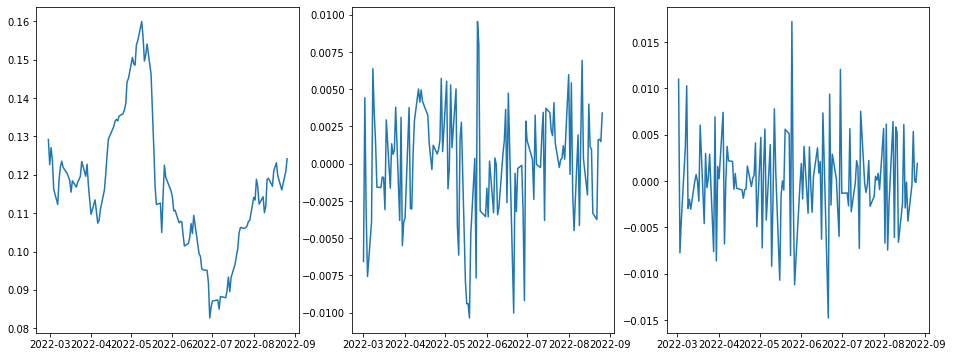

In [225]:
fig , (ax1,ax2,ax3)  = plt.subplots(1,3,figsize=(16,6))
ax1.plot(df_dif['BBWI_COO']),
ax2.plot(df_dif['diff'])
ax3.plot(df_dif['2Ord_diff'])


In [227]:
adfuller(df_dif['2Ord_diff'].dropna())[0]
adfuller(df_dif['2Ord_diff'].dropna())[1]

8.076717860731058e-12

In [233]:
ndiffs(df_dif['BBWI_COO'])
##1 differencing suggested as found through experiment

1

/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


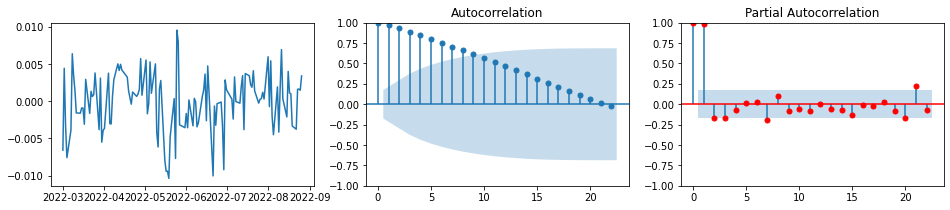

In [241]:
figs , axes = plt.subplots(1,3,figsize= (16,3))
axes[0].plot(df_dif['diff'])
plot_acf(df_dif['BBWI_COO'], ax=axes[1]);
plot_pacf(df_dif['BBWI_COO'],ax=axes[2],c='r');

In [249]:
d = 1
p = 3
q = 3

In [251]:
arima = ARIMA(df_dif['diff'],order=(p,d,q),trend='t')
arima_res = arima.fit()
arima_res.summary()

/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  126
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 498.763
Date:                Tue, 30 Aug 2022   AIC                           -981.525
Time:                        19:55:19   BIC                           -958.899
Sample:                             0   HQIC                          -972.333
                                - 126                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.345e-05      0.000      0.213      0.831      -0.000       0.000
ar.L1         -1.5941      0.583     -2.734      0.006      -2.737      -0.451
ar.L2         -0.7332      0.658     -1.114      0.265      -2.023       0.557
ar.L3          0.0615      0.156      0.395      0.693      -0.244       0.367
ma.L1          0.8776      0.592      1.483      0.138      -0.282       2.037
ma.L2         -0.3988      0.300     -1.328      0.184      -0.987       0.190
ma.L3         -0.5843      0.386     -1.513      0.130      -1.341       0.173
sigma2       1.64e-05   1.88e-06      8.736      0.000    1.27e-05    2.01e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 5.86
Prob(Q):                              0.77   Prob(JB):                         0.05
Heteroskedasticity (H):               1.00   Skew:                             0.25
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [265]:
import pmdarima as pm 

smodel = pm.auto_arima(df_dif['BBWI_COO'].dropna(),
                      start_p=1,max_p=3,
                      start_q=1,max_q= 8,
                      trend='t',
                      seasonal=False,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1028.766, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1027.772, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1029.959, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1029.107, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1027.772, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1028.616, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1026.049, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1029.959, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.895 seconds


In [266]:
arima = ARIMA(df_dif['BBWI_COO'],order=(1,1,0),trend='t')
arima_res = arima.fit()

/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sam/.pyenv/versions/3.8.12/envs/long-short-trade-ideas-generator/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


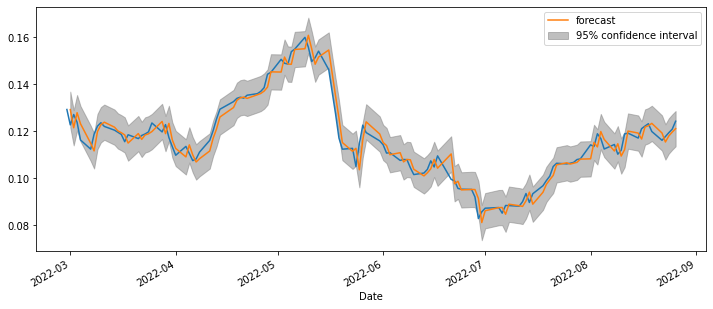

In [271]:
fig ,axs = plt.subplots(1,1,figsize=(12,5))
axs.plot(df_dif['BBWI_COO'])
plot_predict(arima_res,start=1 , end=125, ax=axs);